In [1]:
# prompt: drive mount

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Splitting Data and Storing in HDF5 Format

Loading combined dataset...


<ipython-input-2-b1b1780f6f6e>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(combined_file)


Combined Dataset - Features Shape: (895684, 2048), Labels Shape: (895684,)
Sample Features:
[[-0.099216    0.05850809 -0.09225952 ... -0.00792149 -0.04542159
   0.07880748]
 [-0.09921601  0.05850809 -0.0922595  ... -0.00792149 -0.04542159
   0.07880748]]
Sample Labels:
[0 0]
Splitting dataset...

Dataset Splits:
X_train: (626978, 2048), y_train: (626978,)
X_val: (134353, 2048), y_val: (134353,)
X_test: (134353, 2048), y_test: (134353,)

Sample Training Data:
Features:
[[-0.09921601  0.05850809 -0.0922595  ... -0.00792149 -0.04542159
   0.07880748]
 [-0.09921601  0.05850809 -0.0922595  ... -0.00792149 -0.04542159
   0.07880748]]
Labels:
[0 1]

Sample Validation Data:
Features:
[[-0.09921601  0.05850809 -0.0922595  ... -0.00792149 -0.04542159
   0.07880748]
 [-0.09921599  0.05850809 -0.09225952 ... -0.00792149 -0.0454216
   0.07880748]]
Labels:
[1 0]

Sample Test Data:
Features:
[[-0.09921601  0.05850809 -0.0922595  ... -0.00792149 -0.04542159
   0.07880748]
 [-0.09921601  0.05850809 -0.

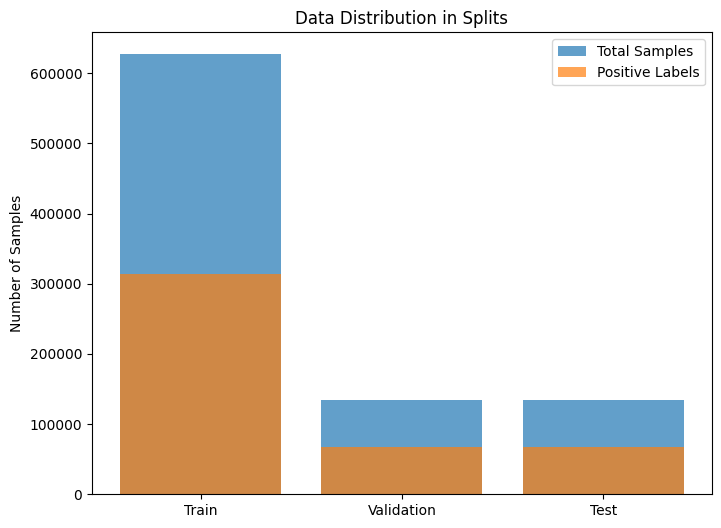

In [2]:
import h5py
import torch
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the combined dataset
combined_file = "/content/drive/MyDrive/Colab Notebooks/DDI_Prediction_Project/data/drug_pair_features_combined.pt"
output_h5_file = "/content/drive/MyDrive/Colab Notebooks/DDI_Prediction_Project/data/drug_pair_features_split.h5"

print("Loading combined dataset...")
data = torch.load(combined_file)
features = np.array(data["features"])
labels = np.array(data["labels"])

# Display dataset shape and sample rows
print(f"Combined Dataset - Features Shape: {features.shape}, Labels Shape: {labels.shape}")
print("Sample Features:")
print(features[:2])
print("Sample Labels:")
print(labels[:2])

# Split the data
print("Splitting dataset...")
X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display shapes of the splits and sample rows
print("\nDataset Splits:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print("\nSample Training Data:")
print(f"Features:\n{X_train[:2]}")
print(f"Labels:\n{y_train[:2]}")

print("\nSample Validation Data:")
print(f"Features:\n{X_val[:2]}")
print(f"Labels:\n{y_val[:2]}")

print("\nSample Test Data:")
print(f"Features:\n{X_test[:2]}")
print(f"Labels:\n{y_test[:2]}")

# Save to HDF5
print("\nSaving data to HDF5 format...")
with h5py.File(output_h5_file, "w") as h5f:
    h5f.create_dataset("X_train", data=X_train)
    h5f.create_dataset("y_train", data=y_train)
    h5f.create_dataset("X_val", data=X_val)
    h5f.create_dataset("y_val", data=y_val)
    h5f.create_dataset("X_test", data=X_test)
    h5f.create_dataset("y_test", data=y_test)

print(f"\nData saved to {output_h5_file}")
print(f"Training Set: {X_train.shape[0]} samples")
print(f"Validation Set: {X_val.shape[0]} samples")
print(f"Test Set: {X_test.shape[0]} samples")

# Visualizations
labels_distribution = [sum(y_train), sum(y_val), sum(y_test)]
labels_total = [len(y_train), len(y_val), len(y_test)]
categories = ['Train', 'Validation', 'Test']

plt.figure(figsize=(8, 6))
plt.bar(categories, labels_total, alpha=0.7, label='Total Samples')
plt.bar(categories, labels_distribution, alpha=0.7, label='Positive Labels')
plt.ylabel('Number of Samples')
plt.title('Data Distribution in Splits')
plt.legend()
plt.show()




### Label Distribution by Class (Stacked Bar Chart)



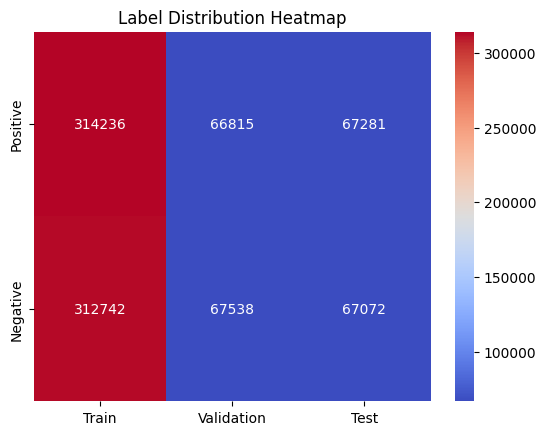

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset sizes and label distributions
labels_total = [len(y_train), len(y_val), len(y_test)]
positive_labels = [sum(y_train), sum(y_val), sum(y_test)]
negative_labels = [total - pos for total, pos in zip(labels_total, positive_labels)]

# Prepare data for heatmap
heatmap_data = np.array([positive_labels, negative_labels])
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm", xticklabels=categories, yticklabels=["Positive", "Negative"])
plt.title("Label Distribution Heatmap")
plt.show()


### Feature Embedding Distribution (t-SNE or PCA)


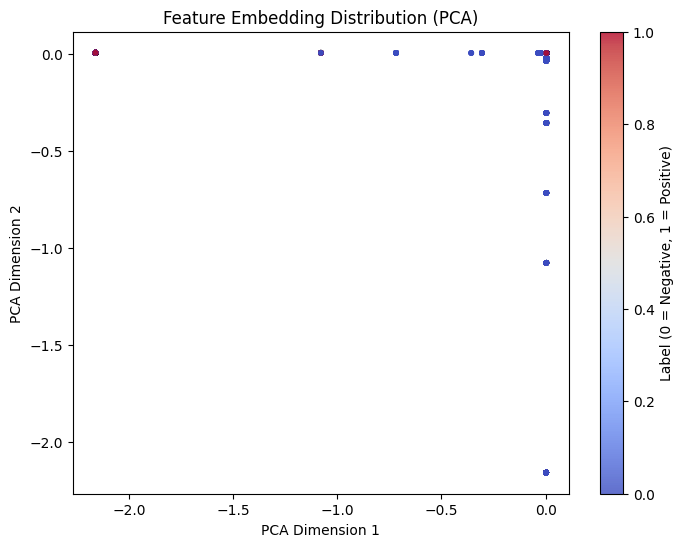

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Scatter plot for reduced dimensions
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="coolwarm", s=10, alpha=0.8)
plt.colorbar(label="Label (0 = Negative, 1 = Positive)")
plt.title("Feature Embedding Distribution (PCA)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()


### Class Imbalance Over Time (Line Plot)

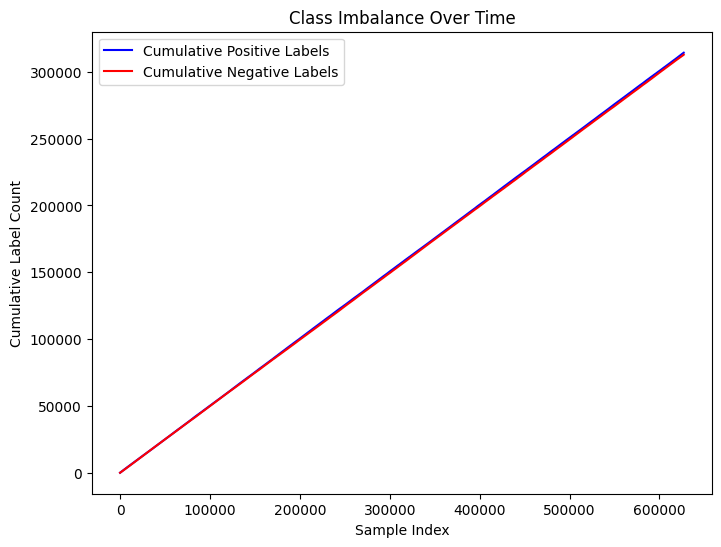

In [ ]:
# Compute cumulative sums for positive/negative labels
cumulative_positive = np.cumsum(y_train)
cumulative_negative = np.arange(len(y_train)) - cumulative_positive + 1

# Plot cumulative trends
plt.figure(figsize=(8, 6))
plt.plot(cumulative_positive, label="Cumulative Positive Labels", color="blue")
plt.plot(cumulative_negative, label="Cumulative Negative Labels", color="red")
plt.title("Class Imbalance Over Time")
plt.xlabel("Sample Index")
plt.ylabel("Cumulative Label Count")
plt.legend()
plt.show()


### Boxplot of Feature Variability Across Splits

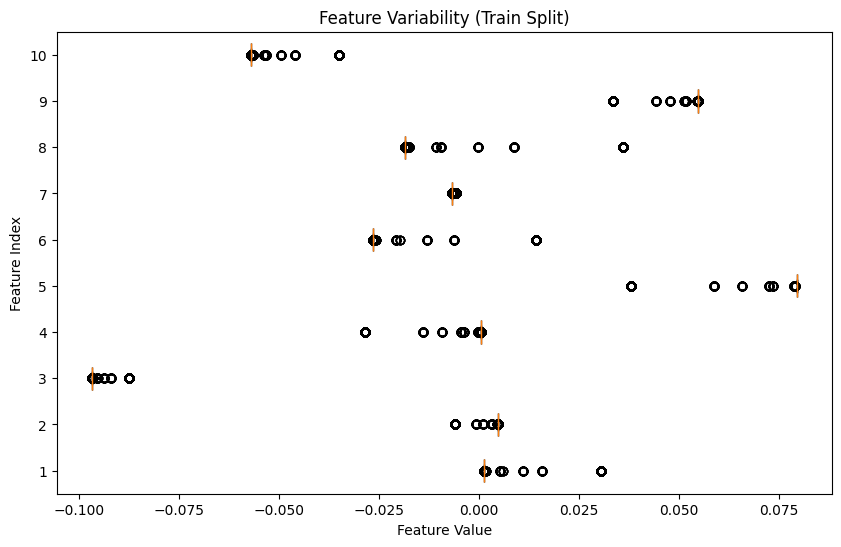

In [ ]:
# Select a subset of features for visualization
subset_features = np.random.choice(X_train.shape[1], 10, replace=False)

# Create boxplots for selected features
plt.figure(figsize=(10, 6))
plt.boxplot(X_train[:, subset_features], vert=False, patch_artist=True)
plt.title("Feature Variability (Train Split)")
plt.xlabel("Feature Value")
plt.ylabel("Feature Index")
plt.show()


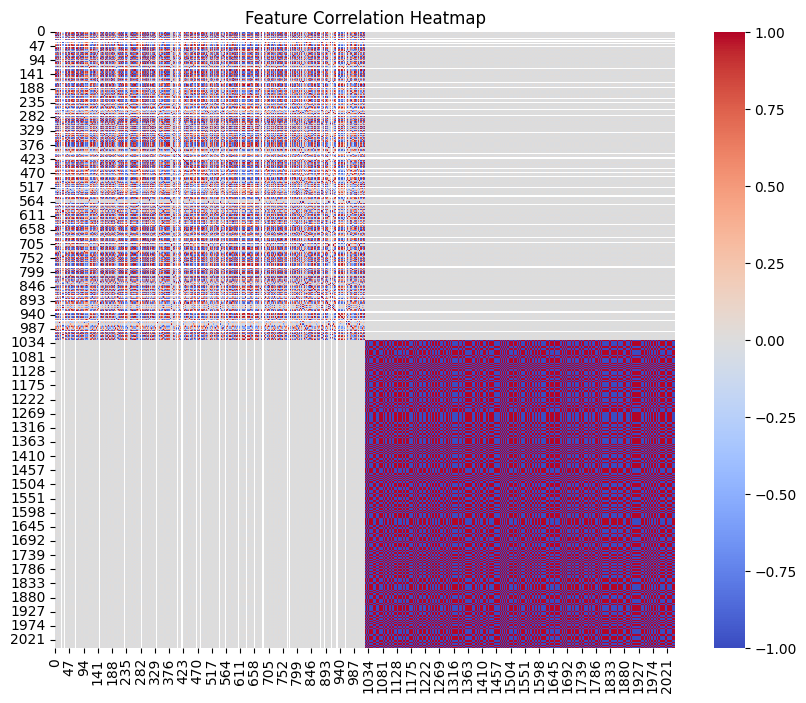

In [ ]:
import pandas as pd
import seaborn as sns

# Convert to DataFrame for correlation computation
feature_sample = X_train[:1000]  # Use a subset to save computation
df_features = pd.DataFrame(feature_sample)

# Compute correlation matrix
corr_matrix = df_features.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()
